# conclusion :


In [ ]:
# fisrt i import all libararies 
# i show the data by head()
# after data preprocessing the data not have null values and no duplicated is found to handle it 
# i drop Id columns because i did not use it there is usless in ML model 
# i put the target columns ("diagnosis")in last of data
# i found outliers after visulization by boxplot and hadle it by (IQR)
# i do some visulize on data to show relation between data
# splitting the data and trainig by 25%
#apply liner regression and logestic regeression and found best model is logestic regression by accuarcy (93% and f1=95%)


# import all libararies

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("Cancer.csv")

# DATA PREPROCESSING

In [6]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df["diagnosis"]=df["diagnosis"].astype("category")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       569 non-null    int64   
 1   diagnosis                569 non-null    category
 2   radius_mean              569 non-null    float64 
 3   texture_mean             569 non-null    float64 
 4   perimeter_mean           569 non-null    float64 
 5   area_mean                569 non-null    float64 
 6   smoothness_mean          569 non-null    float64 
 7   compactness_mean         569 non-null    float64 
 8   concavity_mean           569 non-null    float64 
 9   concave points_mean      569 non-null    float64 
 10  symmetry_mean            569 non-null    float64 
 11  fractal_dimension_mean   569 non-null    float64 
 12  radius_se                569 non-null    float64 
 13  texture_se               569 non-null    float64 
 14  perimeter_

In [10]:
df.shape

(569, 32)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [12]:
df.duplicated().sum()

0

In [13]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
useless_col="id".split()

In [15]:
df.drop(useless_col,axis=1,inplace=True)

In [16]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Add target in last of data

In [18]:
cols=df.columns.tolist()
cols.pop(0)
cols.append("diagnosis")
df=df[cols]
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [19]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

# visulize the data by boxplot

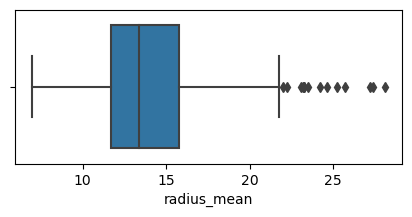

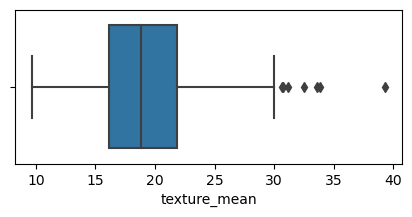

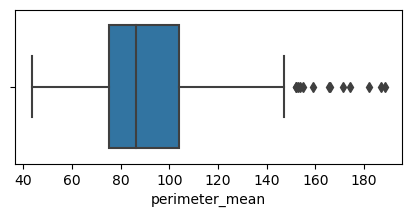

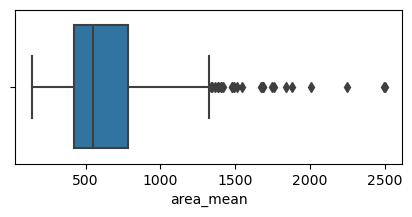

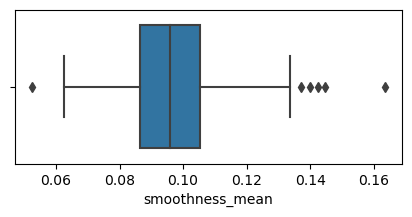

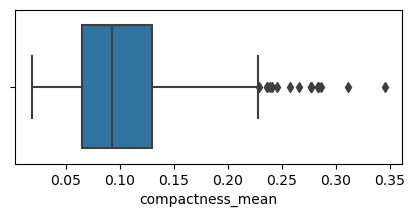

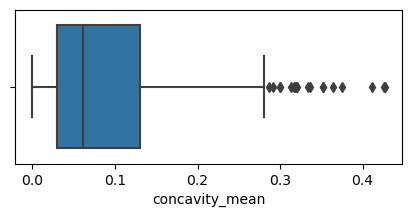

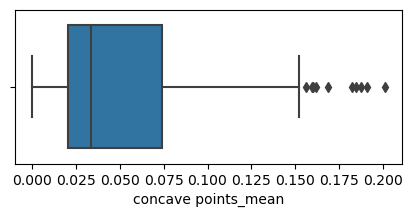

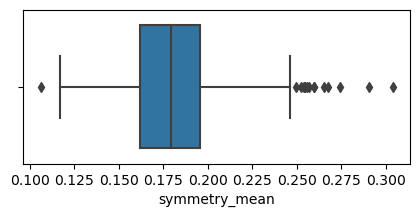

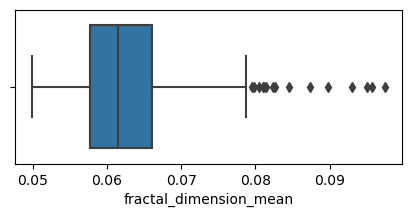

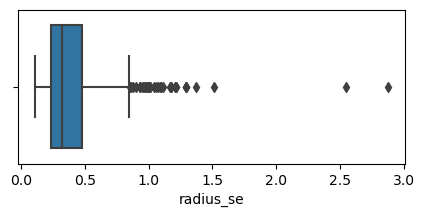

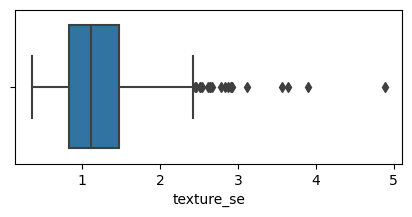

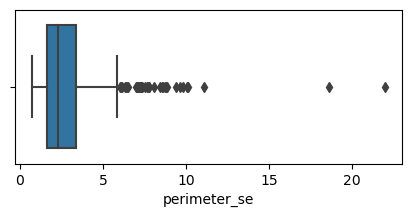

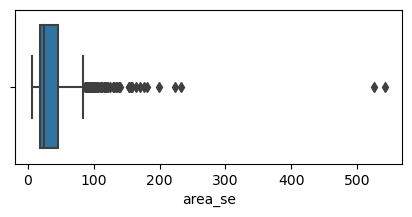

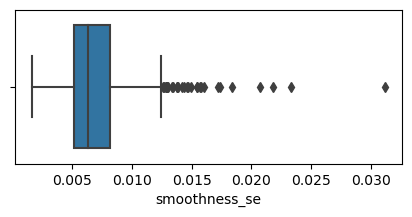

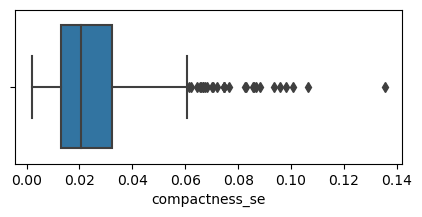

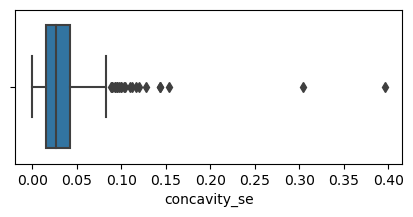

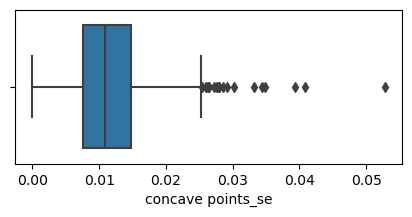

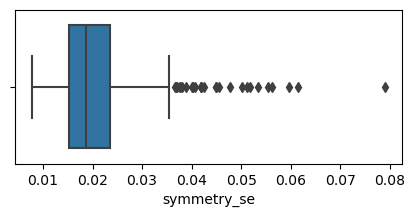

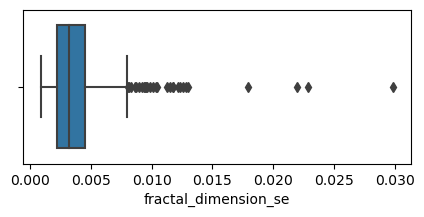

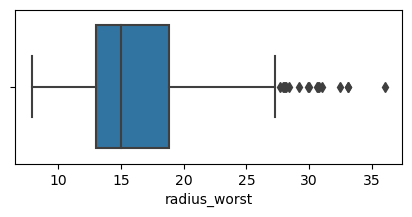

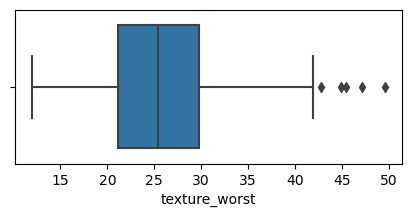

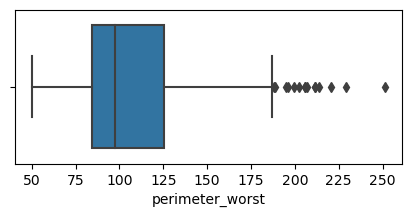

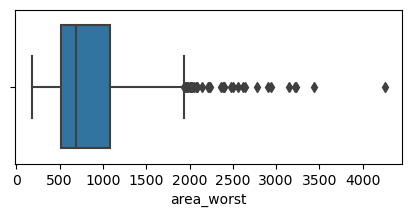

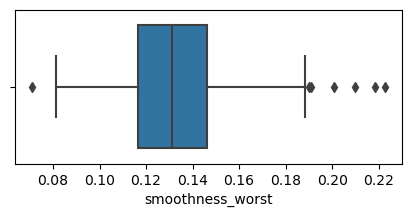

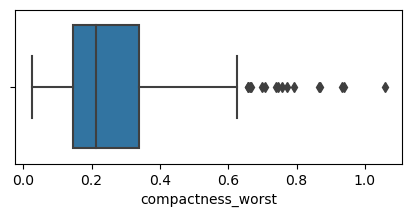

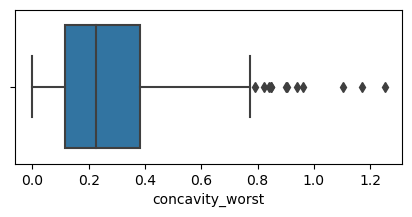

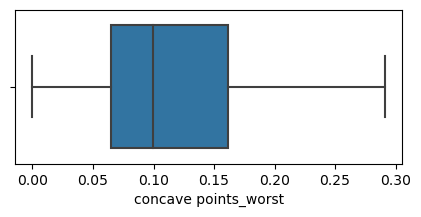

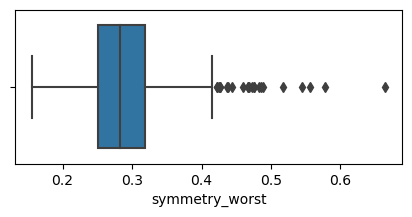

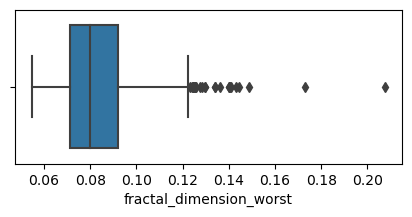

In [20]:
for col in df.select_dtypes("number").columns:
    plt.figure(figsize=(5,2))
    sns.boxplot(df[col])
    plt.subplot()
    plt.show()

#  Handling the outliers 

In [21]:

for col in df.select_dtypes("number").columns:
    Q1 = np.quantile(df[col], 0.25)
    Q3 = np.quantile(df[col], 0.75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + (1.5 * IQR)
    lower_limit=Q1-(1.5*IQR)
    
    upper_outliers = df[df[col] > upper_limit][col].values
    df[col].replace(upper_outliers, upper_limit, inplace=True)
    low_outliers=df[df[col]<lower_limit][col].values
    df[col].replace(low_outliers,lower_limit,inplace=True) 
    

# visulize the data after handling by IQR

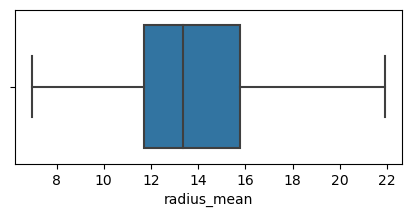

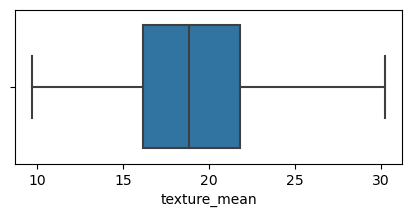

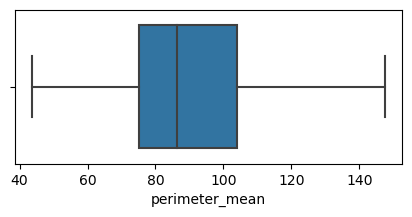

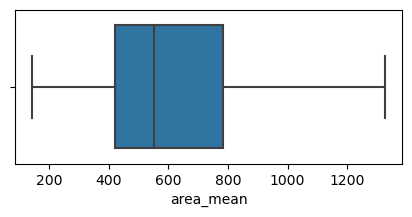

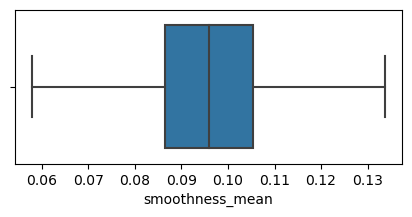

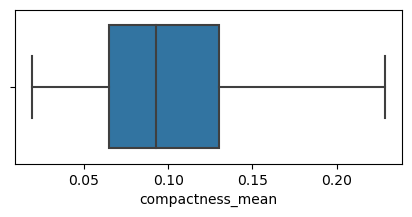

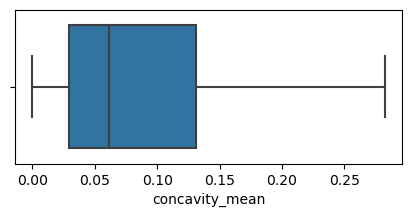

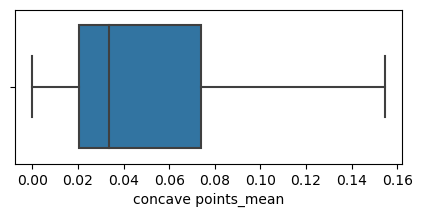

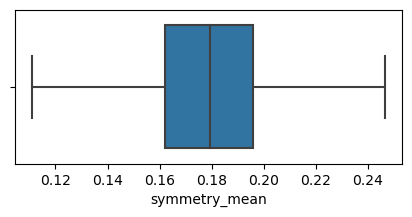

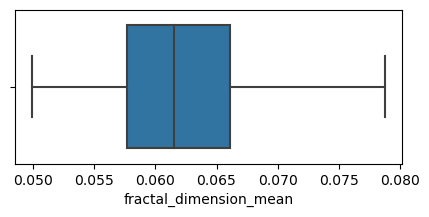

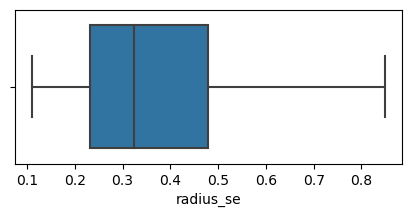

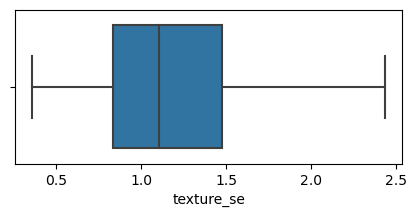

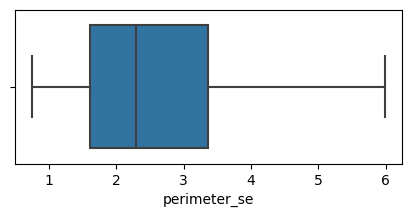

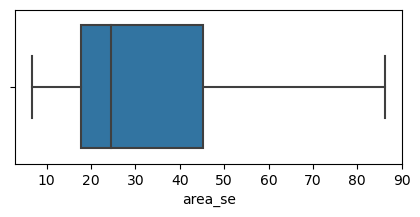

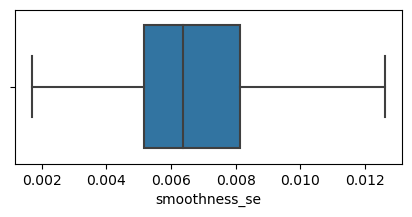

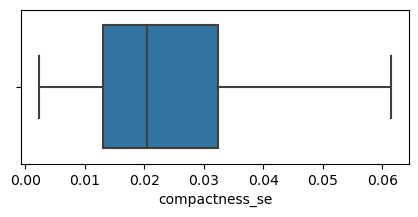

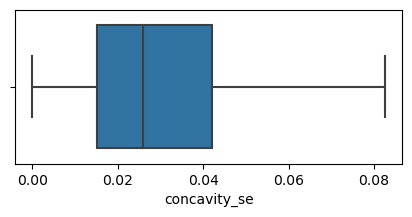

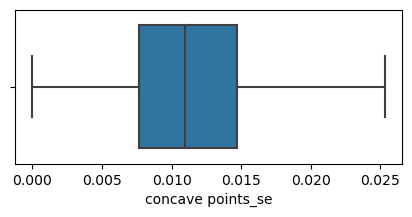

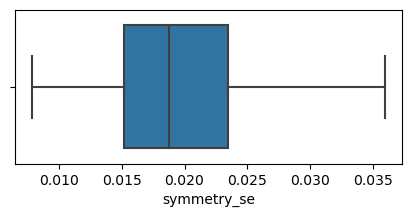

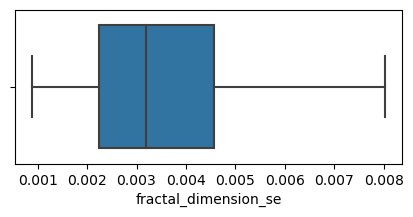

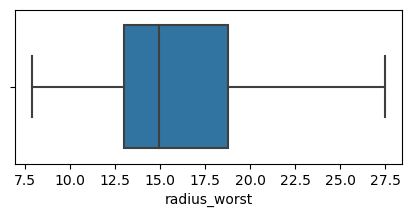

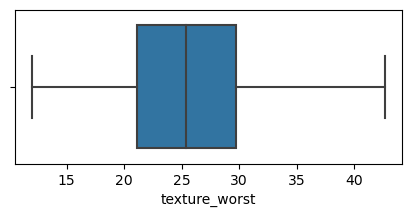

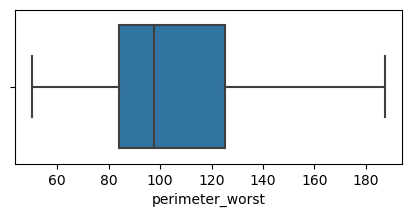

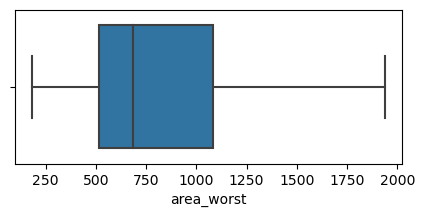

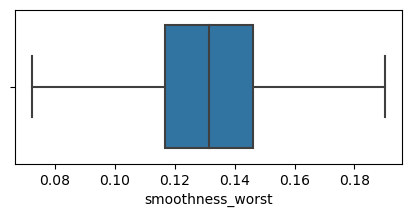

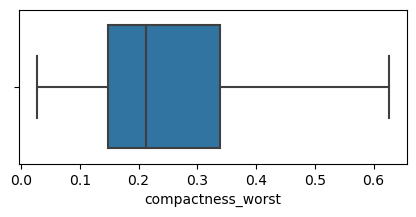

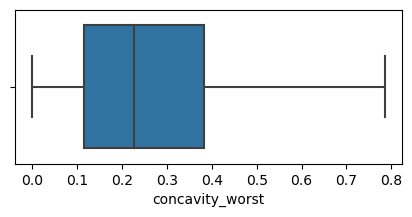

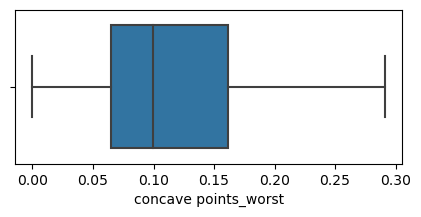

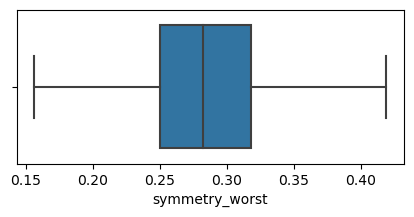

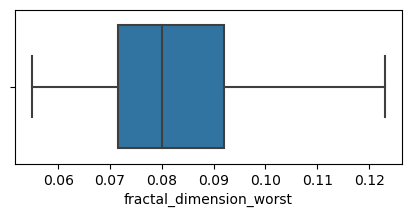

In [22]:
for col in df.select_dtypes("number").columns:
   
    plt.figure(figsize=(5,2))
    sns.boxplot(df[col])
    plt.subplot()
    plt.show()

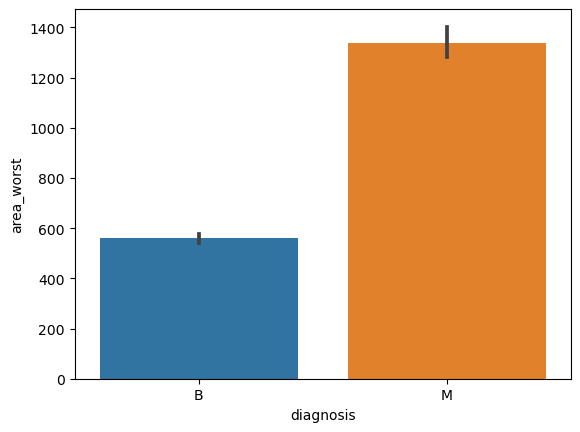

In [23]:
sns.barplot(x="diagnosis",y="area_worst",data=df)
plt.show()

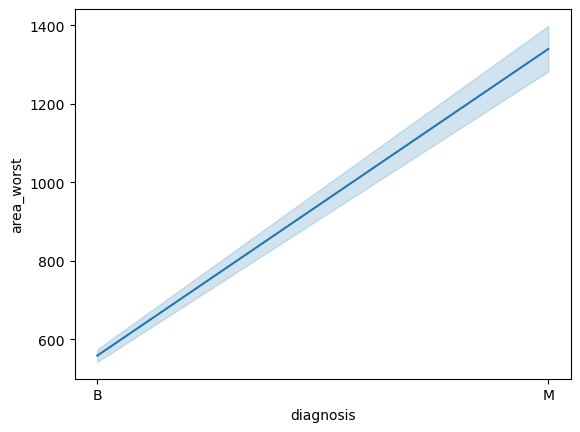

In [24]:
sns.lineplot(x="diagnosis",y="area_worst",data=df)
plt.show()

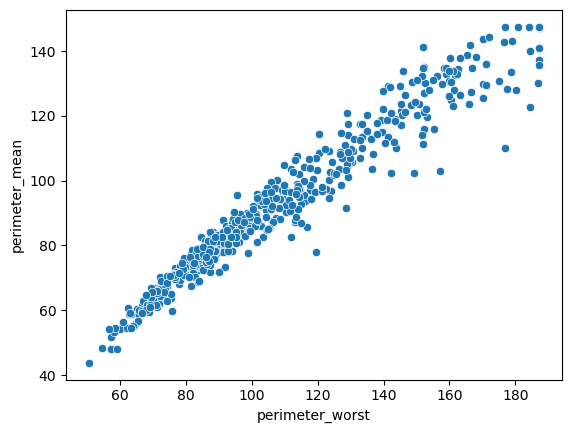

In [25]:
sns.scatterplot(df["perimeter_worst"],df["perimeter_mean"],data=df)
plt.show()

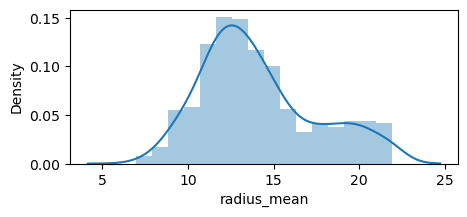

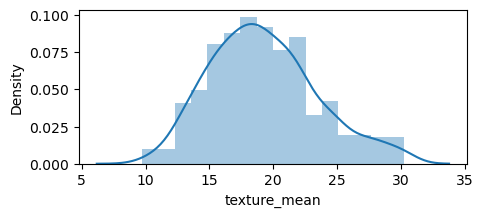

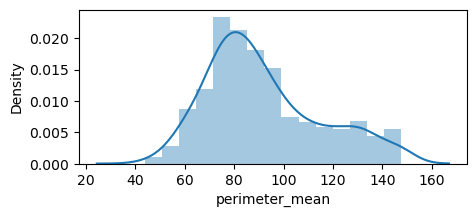

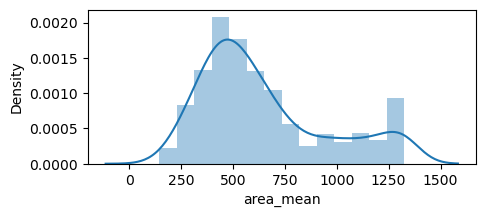

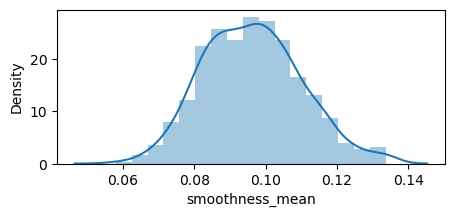

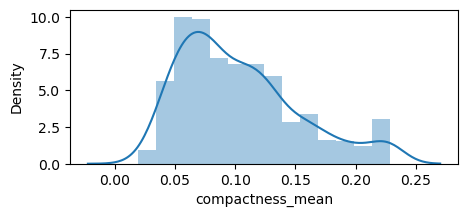

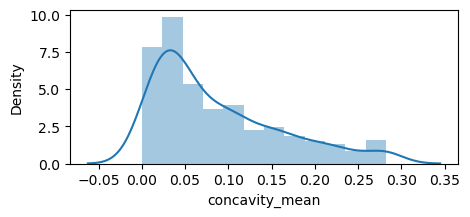

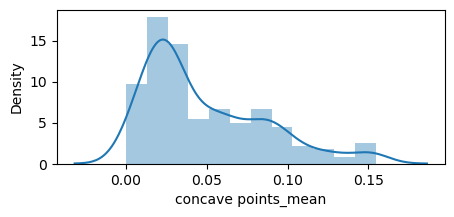

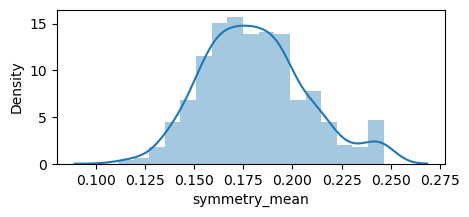

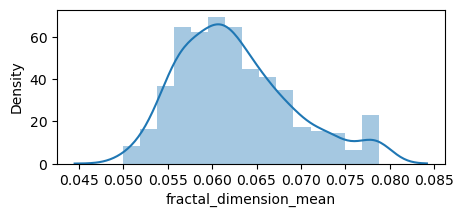

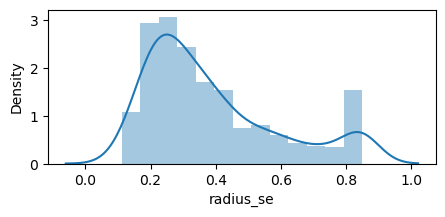

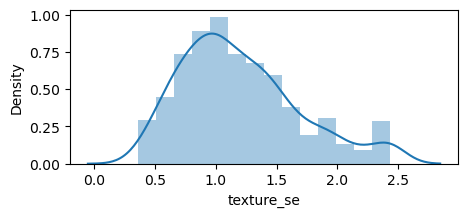

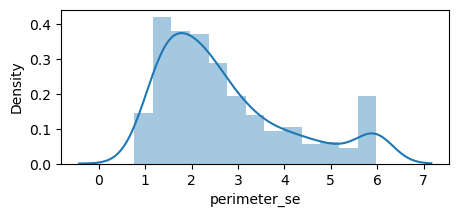

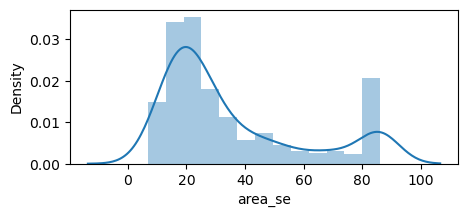

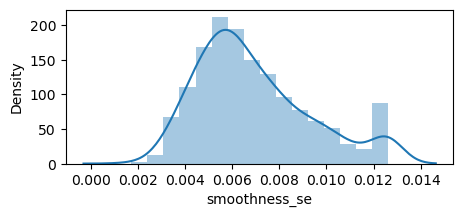

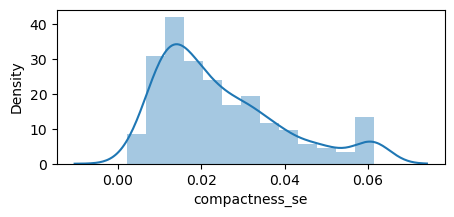

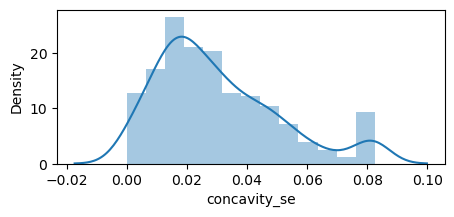

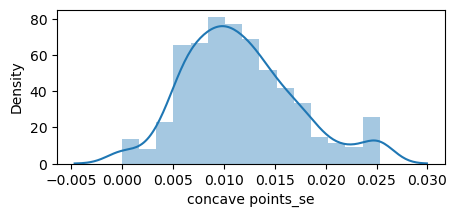

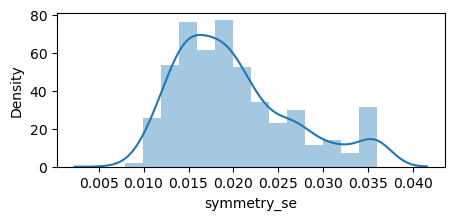

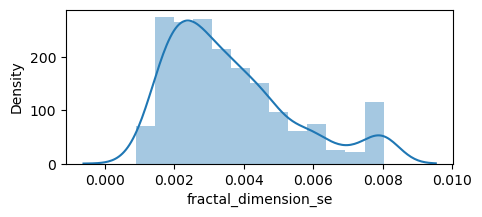

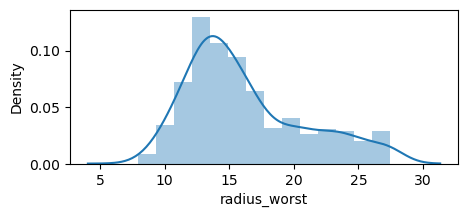

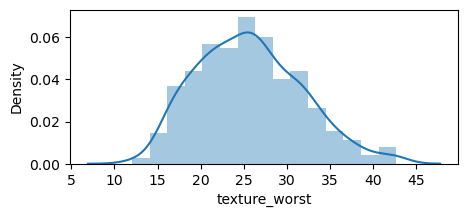

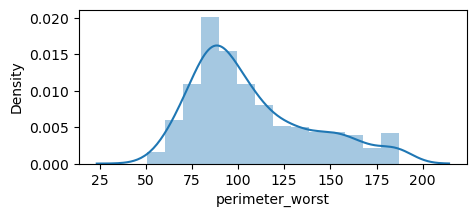

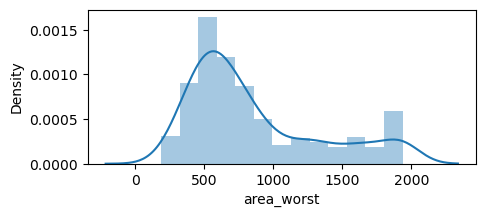

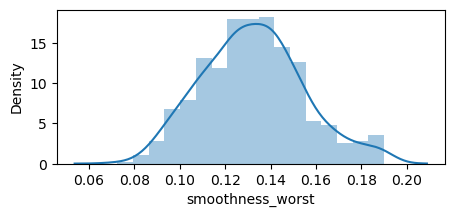

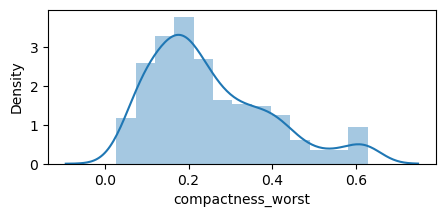

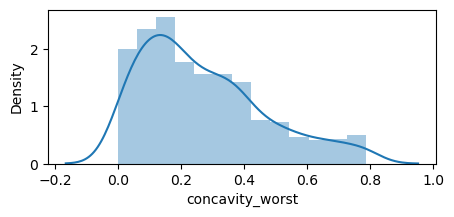

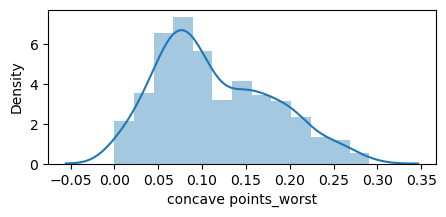

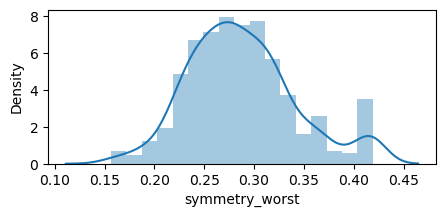

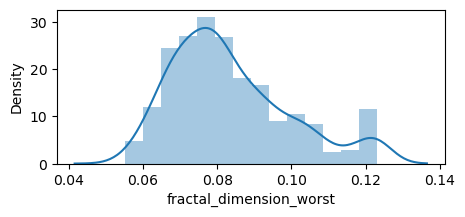

In [26]:

for col in df.select_dtypes("number").columns:
   
    plt.figure(figsize=(5,2))
    sns.distplot(df[col])
    plt.subplot()
    plt.show()



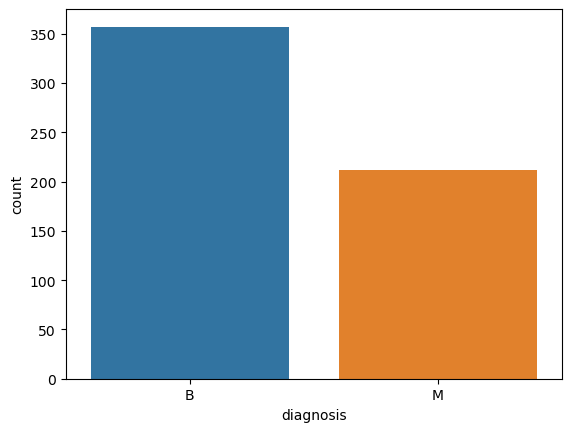

In [27]:
sns.countplot(x="diagnosis",data=df)
plt.show()

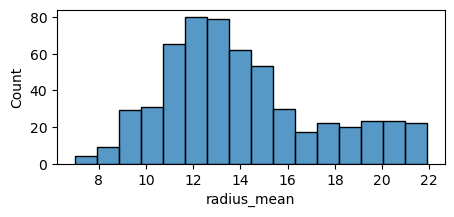

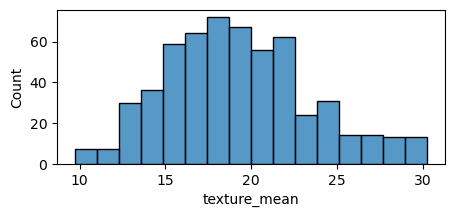

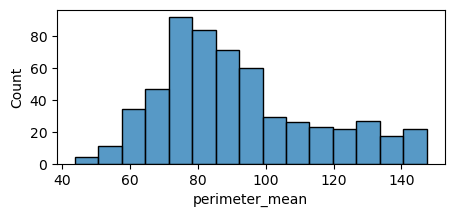

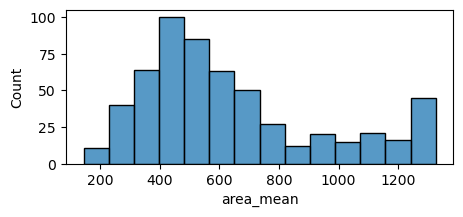

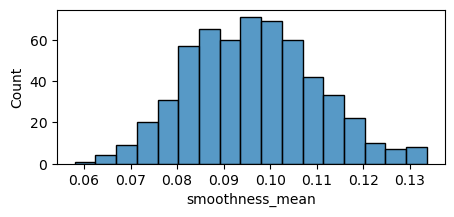

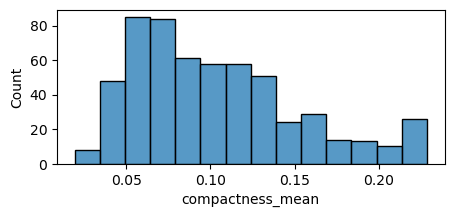

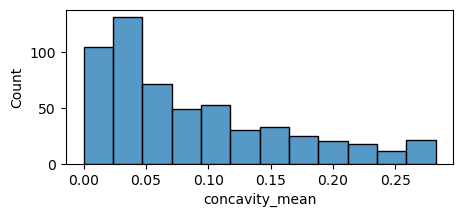

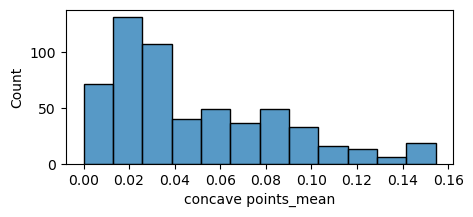

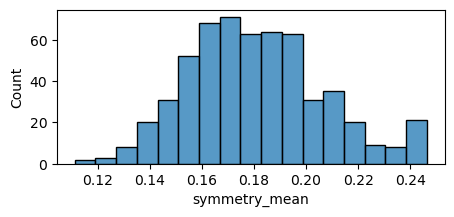

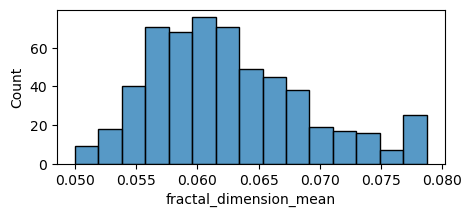

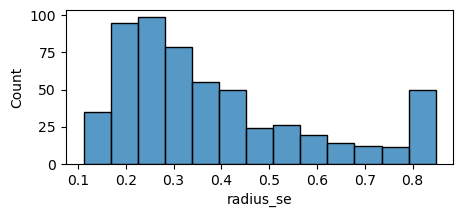

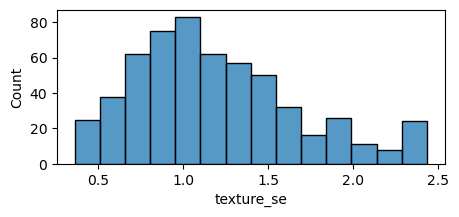

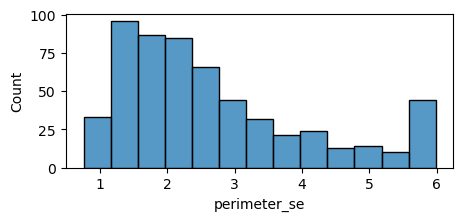

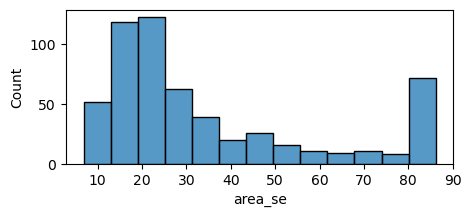

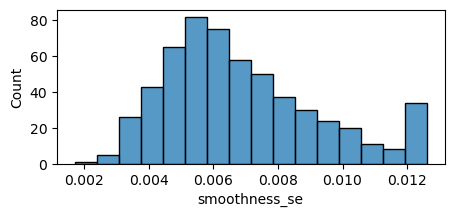

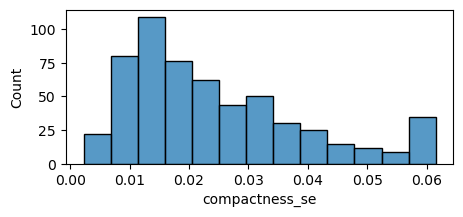

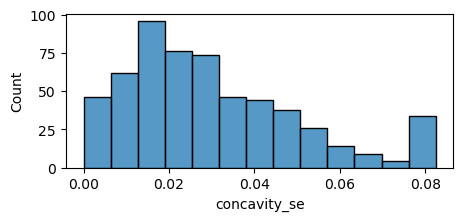

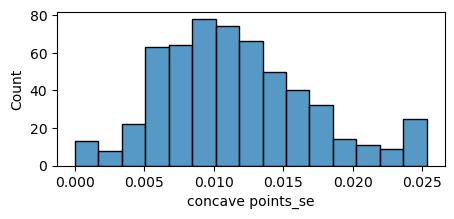

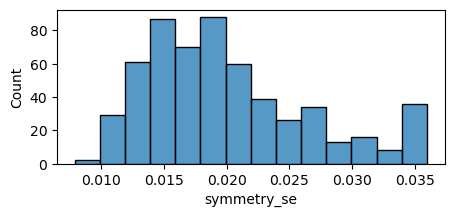

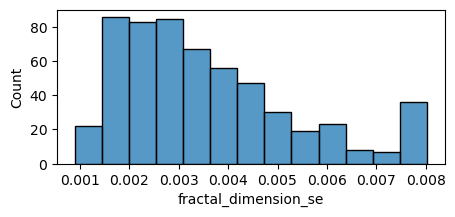

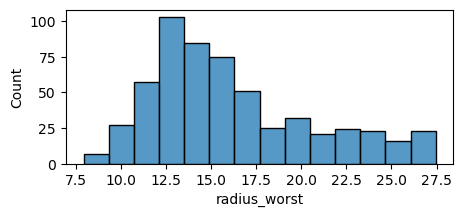

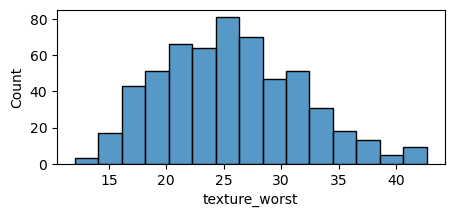

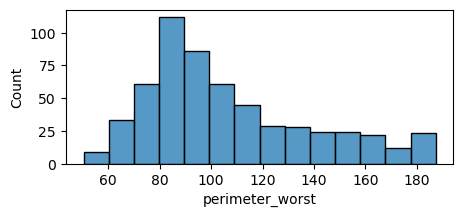

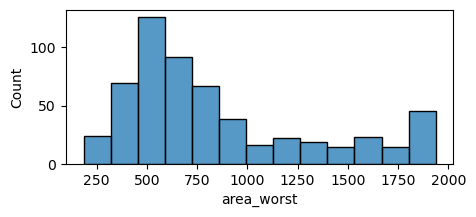

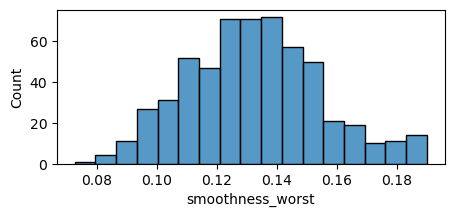

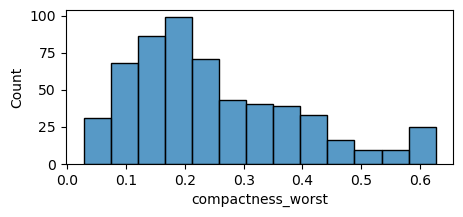

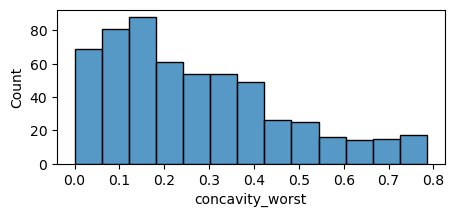

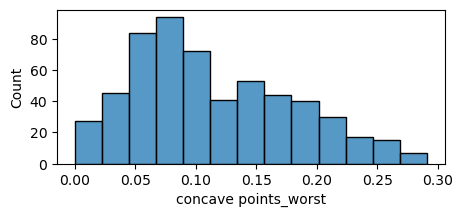

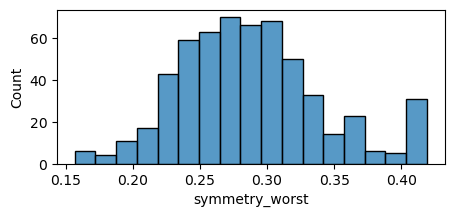

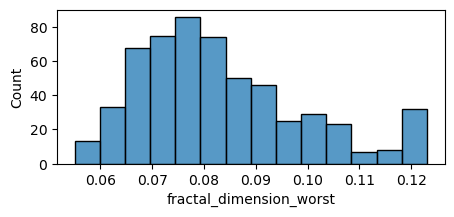

In [28]:
for col in df.select_dtypes("number").columns:
   
    plt.figure(figsize=(5,2))
    sns.histplot(df[col])
    plt.subplot()
    plt.show()


In [29]:
from sklearn import preprocessing
encoder= preprocessing.LabelEncoder()
encoder.fit(df.diagnosis)
df.diagnosis=encoder.transform(df.diagnosis)


In [30]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,...,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890,1
1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902,1
2,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758,1
3,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,...,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301,1
4,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678,1


# splitting the data 

In [36]:
X=df.drop("diagnosis",axis=1)
Y=df["diagnosis"]


# train and test the data

In [37]:
X_Trian,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=.25)

# apply the linear regression model (ML)

In [41]:
model=LinearRegression().fit(X,Y)

In [43]:
print(model.coef_)

[ 1.21265147e-01 -4.41004501e-03 -2.07432502e-02  4.68692319e-04
  7.88097409e-01 -7.93735456e-01  1.69493157e+00  9.56055428e-01
  6.92826813e-02 -8.38853856e+00 -1.06659218e+00 -8.29656408e-02
  4.95043654e-02  1.63912319e-02  1.45813063e+01 -7.38726763e+00
  1.95450268e-01  4.05955393e-01  4.14108253e+00 -9.34089298e+00
  4.50954624e-02  1.81529606e-02 -5.43214283e-03 -4.18162603e-04
  3.71303081e-01  8.19498998e-01 -1.46744623e-01  1.37593846e+00
  2.59514720e-01  4.98938166e+00]


In [44]:
print(model.intercept_)

-0.6226186498306996


In [46]:
model.score(X, Y)

0.7740653453738525

# apply the logistic regression model (ML)

In [49]:
classifier=LogisticRegression(random_state=0)
classifier.fit(X_Trian,Y_Train)

LogisticRegression(random_state=0)

In [50]:
Y_Pred = classifier.predict(X_Test)

In [54]:
conf_mat=confusion_matrix(Y_Test,Y_Pred)
print(conf_mat)

[[90  5]
 [ 5 43]]


In [56]:
print(classification_report(Y_Test,Y_Pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        95
           1       0.90      0.90      0.90        48

    accuracy                           0.93       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143

